<a href="https://colab.research.google.com/github/SidR-13/Winter-Internship/blob/main/Week_6_Superstore_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 6

Retail dataset of a global superstore for 4 years has been taken. the aim of this Project is to perform Exploratory Data Analysis.

Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Which are the most selling products?

In [9]:
boughts = df.groupby('Product Name').agg({'Sales': 'sum'}).sort_values('Sales',ascending=False)[:10]
boughts


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


Which are the Top 10 products by sales?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
  Text(2, 0, 'Cisco TelePresence System EX90 Videoconferencing Unit'),
  Text(3, 0, 'HON 5400 Series Task Chairs for Big and Tall'),
  Text(4, 0, 'GBC DocuBind TL300 Electric Binding System'),
  Text(5, 0, 'GBC Ibimaster 500 Manual ProClick Binding System'),
  Text(6, 0, 'Hewlett Packard LaserJet 3310 Copier'),
  Text(7, 0, 'HP Designjet T520 Inkjet Large Format Printer - 24" Color'),
  Text(8, 0, 'GBC DocuBind P400 Electric Binding System'),
  Text(9, 0, 'High Speed Automatic Electric Letter Opener')])

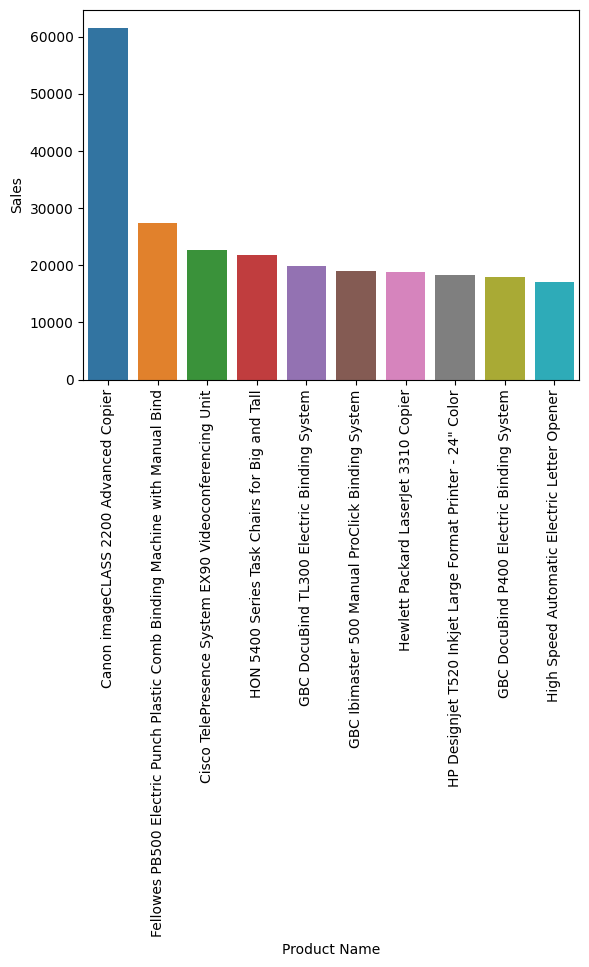

In [10]:
sns.barplot(x='Product Name',y='Sales',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

What category sold the most?

In [12]:
df.groupby(['Category','Sales']).sum()

<ipython-input-12-c7e794994a1c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Category','Sales']).sum()


Row ID  Postal Code
Category   Sales                         
Furniture  1.892        8184      60653.0
           1.988        1359      76106.0
           2.032        3334      60653.0
           2.328        9669     154082.0
           2.784        4301      32303.0
...                      ...          ...
Technology 10499.970    4191      19711.0
           11199.968    2624      10024.0
           13999.960    8154      98115.0
           17499.950    6827      47905.0
           22638.480    2698      32216.0

[6168 rows x 2 columns]

Which are the most profitable category?

In [13]:
profitable_category = pd.DataFrame(df.groupby(['Category']).sum()['Sales'])
profitable_category.sort_values(by=['Sales'], inplace = True, ascending = False)
profitable_category

<ipython-input-13-845a4f90b4db>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_category = pd.DataFrame(df.groupby(['Category']).sum()['Sales'])


,Sales
Category,
Technology,827455.8730
Furniture,728658.5757
Office Supplies,705422.3340


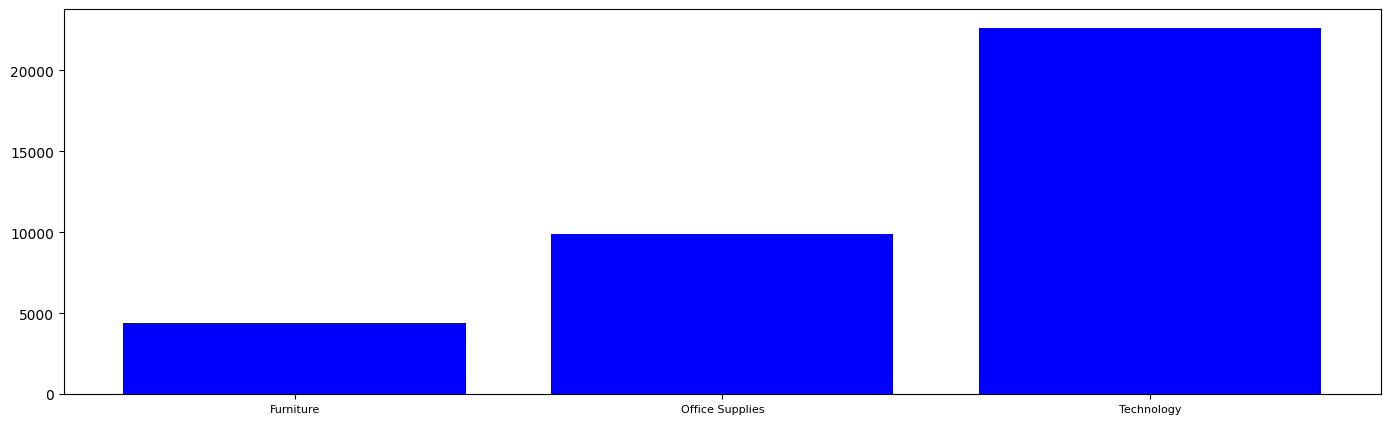

In [14]:
plt.figure(figsize=(17, 5))
plt.bar(df['Category'],df['Sales'],color = 'b')
plt.xticks(size=8)
plt.show()

Total sales values by category and subcategory

In [16]:
df.groupby(['Category','Sub-Category']).sum()

<ipython-input-16-831f7dbde023>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Category','Sub-Category']).sum()


Row ID  Postal Code        Sales
Category        Sub-Category                                   
Furniture       Bookcases     1136640   12596686.0  113813.1987
                Chairs        3022732   34316930.0  322822.7310
                Furnishings   4585585   50410405.0   89212.0180
                Tables        1523031   18213622.0  202810.6280
Office Supplies Appliances    2338368   24885925.0  104618.4030
                Art           3811363   42715603.0   26705.4100
                Binders       7327254   82120128.0  200028.7850
                Envelopes     1148360   13069359.0   16128.0460
                Fasteners      987562   12320752.0    3001.9600
                Labels        1748032   19125468.0   12347.7260
                Paper         6569425   74639522.0   76828.3040
                Storage       3988251   45575170.0  219343.3920
                Supplies       934047   10403108.0   46420.3080
Technology      Accessories   3739802   43399162.0  164186.7000
                Copiers        335891    3688550.0  146248.0940
                Machines       561428    6364668.0  189238.6310
                Phones        4267129   47225495.0  327782.4480

Which are the most selling products in subcategory?

In [17]:
df.groupby(["Category", "Sub-Category"], as_index=False)["Sales"].count()

,Category,Sub-Category,Sales
0,Furniture,Bookcases,226
1,Furniture,Chairs,607
2,Furniture,Furnishings,931
3,Furniture,Tables,314
4,Office Supplies,Appliances,459
5,Office Supplies,Art,785
6,Office Supplies,Binders,1492
7,Office Supplies,Envelopes,248
8,Office Supplies,Fasteners,214
9,Office Supplies,Labels,357


Which customer segments are the most profitable ?

In [20]:
profitable_segment = pd.DataFrame(df.groupby(['Segment']).sum()['Sales'])
profitable_segment.sort_values(by=['Sales'], inplace = True, ascending = False)
profitable_segment

<ipython-input-20-3def82bd4736>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_segment = pd.DataFrame(df.groupby(['Segment']).sum()['Sales'])


,Sales
Segment,
Consumer,1.148061e+06
Corporate,6.884941e+05
Home Office,4.249822e+05


(array([0, 1, 2]),
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

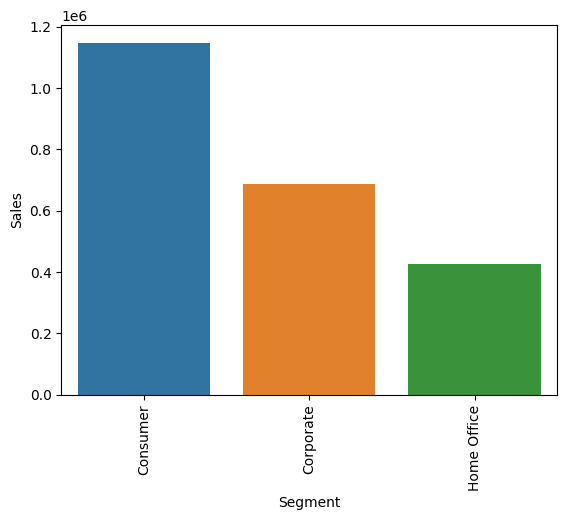

In [22]:
sns.barplot(x='Segment',y='Sales',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

What shipping modes sold the most products?

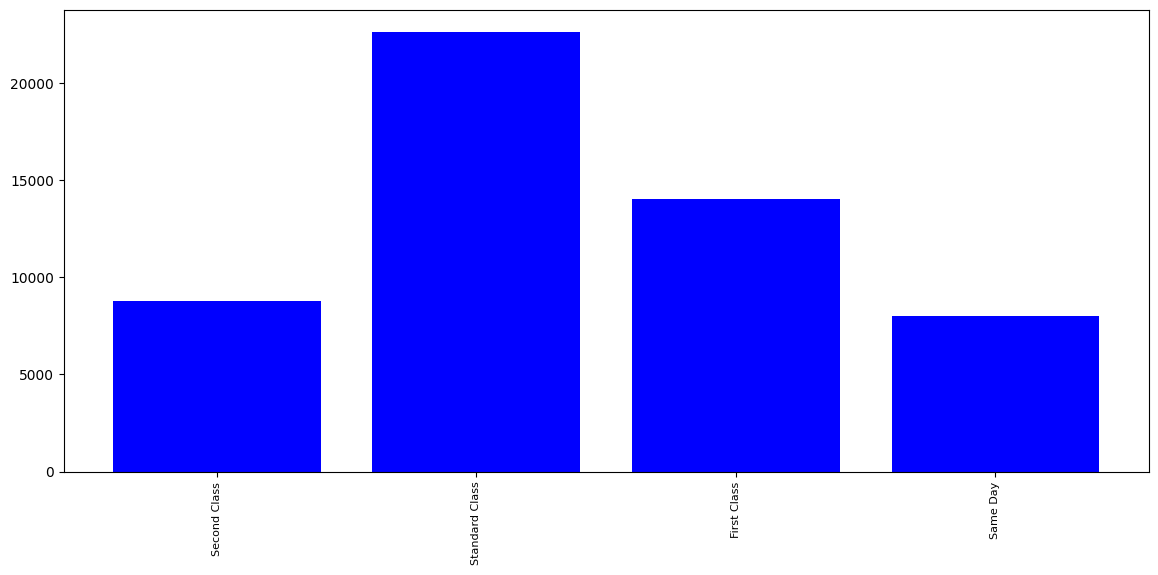

In [23]:
plt.figure(figsize=(14, 6))
plt.bar(df['Ship Mode'],df['Sales'],color = 'b')
plt.xticks(rotation='vertical', size=8)
plt.show()

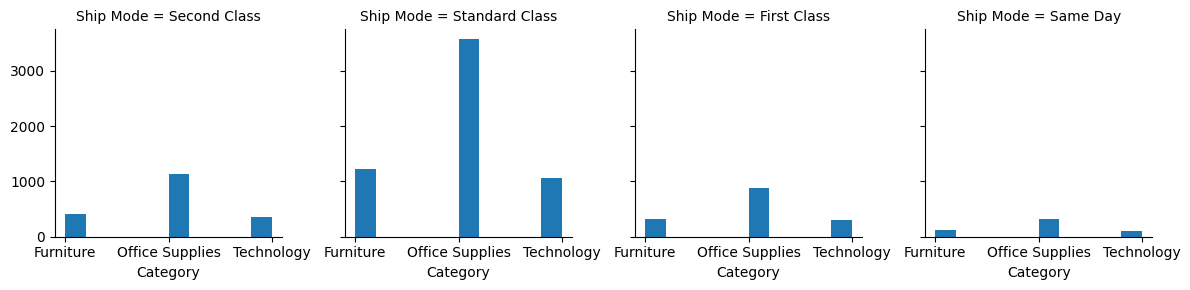

In [24]:
category_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')


What region sold the most products?

<Axes: xlabel='Region', ylabel='count'>

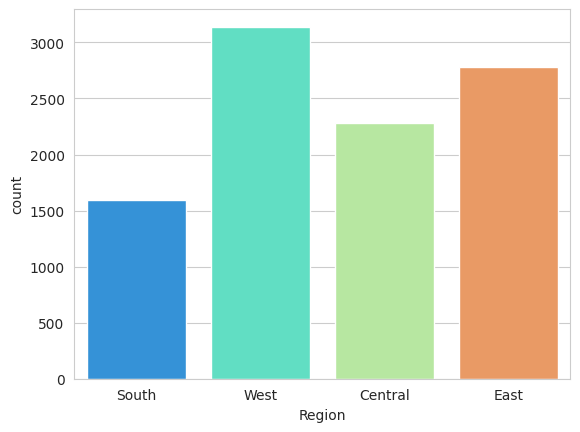

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Region',data=df, palette='rainbow')

Which are the Top 10 States by sales?

In [32]:
states = pd.DataFrame(df.groupby('State').sum()['Sales'])
states.sort_values('Sales',inplace=True, ascending=False)
states.head(10)

<ipython-input-32-2e6bfd3af716>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states = pd.DataFrame(df.groupby('State').sum()['Sales'])


,Sales
State,
California,446306.4635
New York,306361.1470
Texas,168572.5322
Washington,135206.8500
Pennsylvania,116276.6500
Florida,88436.5320
Illinois,79236.5170
Michigan,76136.0740
Ohio,75130.3500


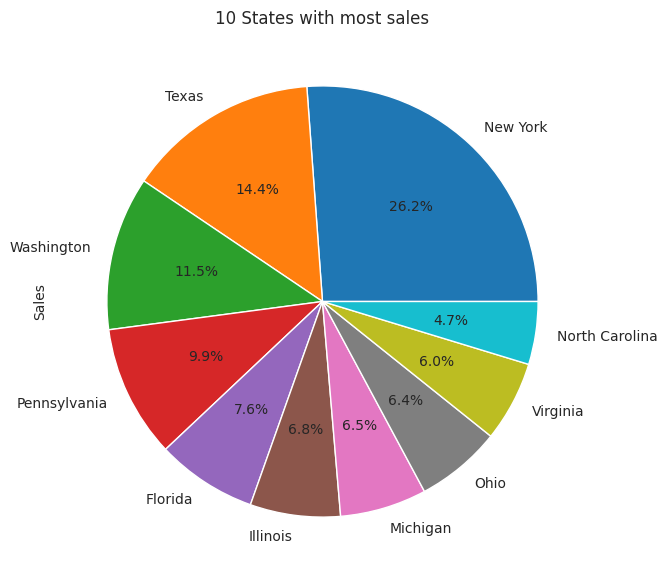

In [33]:
states = states.sort_values(by = 'Sales',ascending = False)[1:11]
states['Sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 States with most sales')
plt.show()


Who are the top-10 most profitable customers?

In [35]:
data10 = df.sort_values('Sales',ascending=False).head(10)[['Order ID','Customer Name','Sales']]
data10

,Order ID,Customer Name,Sales
2697,CA-2015-145317,Sean Miller,22638.480
6826,CA-2017-118689,Tamara Chand,17499.950
8153,CA-2018-140151,Raymond Buch,13999.960
2623,CA-2018-127180,Tom Ashbrook,11199.968
4190,CA-2018-166709,Hunter Lopez,10499.970
9039,CA-2017-117121,Adrian Barton,9892.740
4098,CA-2015-116904,Sanjit Chand,9449.950
4277,US-2017-107440,Bill Shonely,9099.930
8488,CA-2017-158841,Sanjit Engle,8749.950
6425,CA-2017-143714,Christopher Conant,8399.976


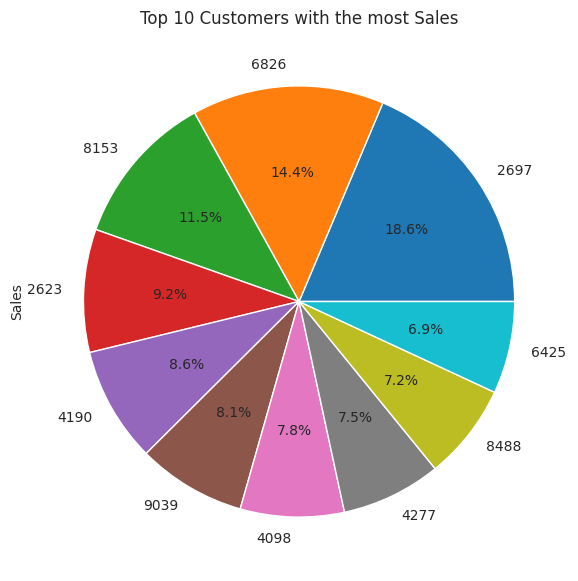

In [58]:
data10['Sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('Top 10 Customers with the most Sales')
plt.show()